# GPR


---------------------GPR DEMO-------------------------
Basic Example
Before Optimization


(array([[1.06441525],
        [1.04415197],
        [1.02114133],
        [0.99534976],
        [0.9667825 ],
        [0.93548685],
        [0.90155497],
        [0.86512609],
        [0.82638807],
        [0.78557826],
        [0.74298355],
        [0.69893958],
        [0.65382897],
        [0.60807878],
        [0.56215683],
        [0.51656722],
        [0.47184487],
        [0.42854919],
        [0.38725695],
        [0.34855437],
        [0.31302865],
        [0.28125896],
        [0.25380706],
        [0.23120769],
        [0.21395897],
        [0.20251287],
        [0.19726604],
        [0.19855112],
        [0.20662874],
        [0.22168038],
        [0.24380233],
        [0.27300077],
        [0.30918827],
        [0.35218172],
        [0.40170187],
        [0.45737447],
        [0.51873314],
        [0.58522395],
        [0.65621161],
        [0.73098738],
        [0.80877846],
        [0.88875879],
        [0.97006117],
        [1.05179036],
        [1.13303721],
        [1

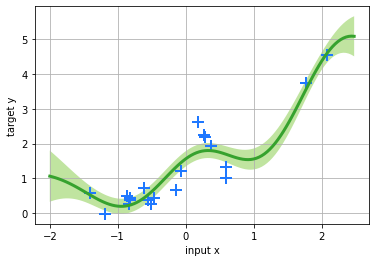

Number of line searches 34


After Optimization


(array([[ 1.76159316],
        [ 1.74656146],
        [ 1.72558567],
        [ 1.69730491],
        [ 1.66031676],
        [ 1.61326264],
        [ 1.55493269],
        [ 1.4843849 ],
        [ 1.40107047],
        [ 1.30495503],
        [ 1.19662379],
        [ 1.07735847],
        [ 0.94917461],
        [ 0.81481061],
        [ 0.6776628 ],
        [ 0.54166564],
        [ 0.41112028],
        [ 0.29047932],
        [ 0.18409907],
        [ 0.09597331],
        [ 0.02946422],
        [-0.01295305],
        [-0.02991583],
        [-0.02135314],
        [ 0.01139718],
        [ 0.06554824],
        [ 0.13691489],
        [ 0.22006679],
        [ 0.30859133],
        [ 0.39546731],
        [ 0.47354107],
        [ 0.53608487],
        [ 0.5774039 ],
        [ 0.59344458],
        [ 0.58234479],
        [ 0.54485998],
        [ 0.4845985 ],
        [ 0.40800833],
        [ 0.32407614],
        [ 0.243727  ],
        [ 0.17894804],
        [ 0.14169705],
        [ 0.14269283],
        [ 0

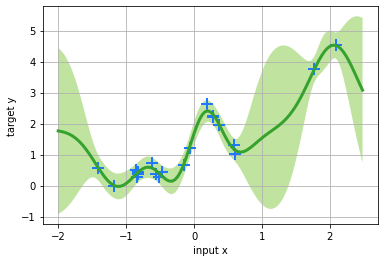

Number of line searches 6


More Advanced Example (using a non-zero mean and Matern7 kernel)
Optimized negative log marginal likelihood: 18.653


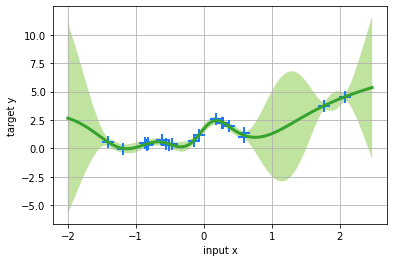

--------------------END OF DEMO-----------------------


In [2]:
from __future__ import print_function
#================================================================================
#    Marion Neumann [marion dot neumann at uni-bonn dot de]
#    Daniel Marthaler [dan dot marthaler at gmail dot com]
#    Shan Huang [shan dot huang at iais dot fraunhofer dot de]
#    Kristian Kersting [kristian dot kersting at cs dot tu-dortmund dot de]
#
#    This file is part of pyGPs.
#    The software package is released under the BSD 2-Clause (FreeBSD) License.
#
#    Copyright (c) by
#    Marion Neumann, Daniel Marthaler, Shan Huang & Kristian Kersting, 18/02/2014
#================================================================================

import pyGPs
import numpy as np

# This demo will not only introduce GP regression model,
# but provides a gerneral insight of our tourbox.

# You may want to read it before reading other models.
# current possible models are:
#     pyGPs.GPR          -> Regression
#     pyGPs.GPC          -> Classification
#     pyGPs.GPR_FITC     -> Sparse GP Regression
#     pyGPs.GPC_FITC     -> Sparse GP Classification
#     pyGPs.GPMC         -> Muli-class Classification



print('')
print('---------------------GPR DEMO-------------------------')

#----------------------------------------------------------------------
# Load demo data (generated from Gaussians)
#----------------------------------------------------------------------
demoData = np.load('regression_data.npz')
x = demoData['x']            # training data
y = demoData['y']            # training target
z = demoData['xstar']        # test data

#----------------------------------------------------------------------
# A five-line example
#----------------------------------------------------------------------
print('Basic Example')
model = pyGPs.GPR()          # model
print('Before Optimization')
model.setData(x,y)
model.predict(z)             # predict test cases (before optimization)
model.plot()                 # and plot result
model.optimize(x, y)         # optimize hyperparamters (default optimizer: single run minimize)
print('After Optimization')
model.predict(z)             # predict test cases
model.plot()                 # and plot result

#----------------------------------------------------------------------
# Now lets do another example to get more insight to the toolbox
#----------------------------------------------------------------------
print('More Advanced Example (using a non-zero mean and Matern7 kernel)')
model = pyGPs.GPR()           # start from a new model

# Specify non-default mean and covariance functions
# SEE doc_kernel_mean for documentation of all kernels/means
m = pyGPs.mean.Const() + pyGPs.mean.Linear()
k = pyGPs.cov.Matern(d=7) # Approximates RBF kernel
model.setPrior(mean=m, kernel=k)



# Specify optimization method (single run "Minimize" by default)
# @SEE doc_optimization for documentation of optimization methods
#model.setOptimizer("RTMinimize", num_restarts=30)
#model.setOptimizer("CG", num_restarts=30)
#model.setOptimizer("LBFGSB", num_restarts=30)

# Instead of getPosterior(), which only fits data using given hyperparameters,
# optimize() will optimize hyperparamters based on marginal likelihood
# the deafult mean will be adapted to the average value of the training labels.
# ..if you do not specify mean function by your own.
model.optimize(x, y)

# There are several properties you can get from the model
# For example:
#   model.nlZ
#   model.dnlZ.cov
#   model.dnlZ.lik
#   model.dnlZ.mean
#   model.posterior.sW
#   model.posterior.alpha
#   model.posterior.L
#   model.covfunc.hyp
#   model.meanfunc.hyp
#   model.likfunc.hyp
#   model.ym (predictive means)
#   model.ys2 (predictive variances)
#   model.fm (predictive latent means)
#   model.fs2 (predictive latent variances)
#   model.lp (log predictive probability)
print('Optimized negative log marginal likelihood:', round(model.nlZ,3))


# Predict test data
# output mean(ymu)/variance(ys2), latent mean(fmu)/variance(fs2), and log predictive probabilities(lp)
ym, ys2, fmu, fs2, lp = model.predict(z)


# Set range of axis for plotting
# NOTE: plot() is a toy method only for 1-d data
model.plot()
# model.plot(axisvals=[-1.9, 1.9, -0.9, 3.9]))


#----------------------------------------------------------------------
# A bit more things you can do
#----------------------------------------------------------------------

# [For all model] Speed up prediction time if you know posterior in advance
post = model.posterior    # already known before


ym, ys2, fmu, fs2, lp = model.predict_with_posterior(post,z)
# ...other than model.predict(z)


# [Only for Regresstion] Specify noise of data (sigma=0.1 by default)
# You don't need it if you optimize it later anyway
model.setNoise( log_sigma=np.log(0.1) )

print('--------------------END OF DEMO-----------------------')



## import package data

In [4]:
from __future__ import print_function
#================================================================================
#    Marion Neumann [marion dot neumann at uni-bonn dot de]
#    Daniel Marthaler [dan dot marthaler at gmail dot com]
#    Shan Huang [shan dot huang at iais dot fraunhofer dot de]
#    Kristian Kersting [kristian dot kersting at cs dot tu-dortmund dot de]
#
#    This file is part of pyGPs.
#    The software package is released under the BSD 2-Clause (FreeBSD) License.
#
#    Copyright (c) by
#    Marion Neumann, Daniel Marthaler, Shan Huang & Kristian Kersting, 18/02/2014
#================================================================================

import pyGPs
import numpy as np

# This demo will not only introduce GP regression model,
# but provides a gerneral insight of our tourbox.

# You may want to read it before reading other models.
# current possible models are:
#     pyGPs.GPR          -> Regression
#     pyGPs.GPC          -> Classification
#     pyGPs.GPR_FITC     -> Sparse GP Regression
#     pyGPs.GPC_FITC     -> Sparse GP Classification
#     pyGPs.GPMC         -> Muli-class Classification



print('')
print('---------------------GPR DEMO-------------------------')

#----------------------------------------------------------------------
# Load demo data (generated from Gaussians)
#----------------------------------------------------------------------
demoData = np.load('regression_data.npz')
x = demoData['x']            # training data
y = demoData['y']            # training target
z = demoData['xstar']        # test data




---------------------GPR DEMO-------------------------


In [12]:
x
y
z

array([[ 2.08397043],
       [-0.82101807],
       [-0.6178707 ],
       [-1.18382261],
       [ 0.27408744],
       [ 0.59944173],
       [ 1.76889792],
       [-0.46564555],
       [ 0.58885278],
       [-0.83298221],
       [-0.51210653],
       [ 0.27788314],
       [-0.06587043],
       [-0.82141236],
       [ 0.18539944],
       [-0.85829617],
       [ 0.37078663],
       [-1.40986916],
       [-0.14466841],
       [-0.55329962]])

array([[ 4.54920375],
       [ 0.37198557],
       [ 0.71130797],
       [-0.01321289],
       [ 2.25547326],
       [ 1.00991575],
       [ 3.74467594],
       [ 0.42459277],
       [ 1.32283365],
       [ 0.27829829],
       [ 0.26722913],
       [ 2.20011229],
       [ 1.20060998],
       [ 0.4399717 ],
       [ 2.62858043],
       [ 0.50377482],
       [ 1.94252531],
       [ 0.57913395],
       [ 0.67087442],
       [ 0.37735376]])

array([[-2.  ],
       [-1.96],
       [-1.92],
       [-1.88],
       [-1.84],
       [-1.8 ],
       [-1.76],
       [-1.72],
       [-1.68],
       [-1.64],
       [-1.6 ],
       [-1.56],
       [-1.52],
       [-1.48],
       [-1.44],
       [-1.4 ],
       [-1.36],
       [-1.32],
       [-1.28],
       [-1.24],
       [-1.2 ],
       [-1.16],
       [-1.12],
       [-1.08],
       [-1.04],
       [-1.  ],
       [-0.96],
       [-0.92],
       [-0.88],
       [-0.84],
       [-0.8 ],
       [-0.76],
       [-0.72],
       [-0.68],
       [-0.64],
       [-0.6 ],
       [-0.56],
       [-0.52],
       [-0.48],
       [-0.44],
       [-0.4 ],
       [-0.36],
       [-0.32],
       [-0.28],
       [-0.24],
       [-0.2 ],
       [-0.16],
       [-0.12],
       [-0.08],
       [-0.04],
       [ 0.  ],
       [ 0.04],
       [ 0.08],
       [ 0.12],
       [ 0.16],
       [ 0.2 ],
       [ 0.24],
       [ 0.28],
       [ 0.32],
       [ 0.36],
       [ 0.4 ],
       [ 0.44],
       [

## A five-line example

In [7]:
model.predict(z)

(array([[ 1.25261636],
        [ 1.23758465],
        [ 1.21660887],
        [ 1.1883281 ],
        [ 1.15133995],
        [ 1.10428583],
        [ 1.04595589],
        [ 0.97540809],
        [ 0.89209366],
        [ 0.79597822],
        [ 0.68764699],
        [ 0.56838166],
        [ 0.4401978 ],
        [ 0.3058338 ],
        [ 0.16868599],
        [ 0.03268883],
        [-0.09785653],
        [-0.21849748],
        [-0.32487773],
        [-0.4130035 ],
        [-0.47951259],
        [-0.52192985],
        [-0.53889263],
        [-0.53032994],
        [-0.49757963],
        [-0.44342856],
        [-0.37206191],
        [-0.28891001],
        [-0.20038548],
        [-0.11350949],
        [-0.03543573],
        [ 0.02710806],
        [ 0.0684271 ],
        [ 0.08446777],
        [ 0.07336798],
        [ 0.03588318],
        [-0.02437831],
        [-0.10096848],
        [-0.18490067],
        [-0.26524981],
        [-0.33002877],
        [-0.36727975],
        [-0.36628398],
        [-0

Basic Example
Before Optimization


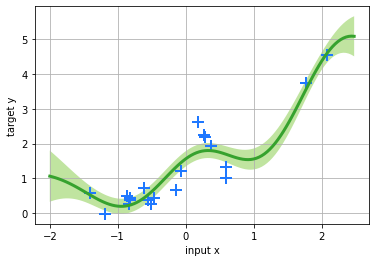

Number of line searches 34


After Optimization


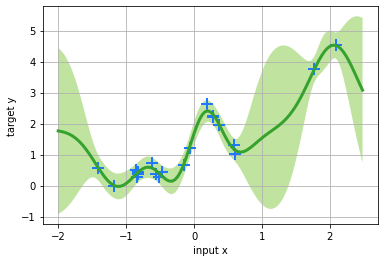

In [9]:
#----------------------------------------------------------------------
# A five-line example
#----------------------------------------------------------------------
print('Basic Example')
model = pyGPs.GPR()          # model
print('Before Optimization')
model.setData(x,y)
y_z=model.predict(z)             # predict test cases (before optimization)
model.plot()                 # and plot result
model.optimize(x, y)         # optimize hyperparamters (default optimizer: single run minimize)
print('After Optimization')
y_z_predicted=model.predict(z)             # predict test cases
model.plot()                 # and plot result

# GPR_FITC

Number of line searches 27



-------------------GPR_FITC DEMO----------------------
Example 1: default inducing points
Negative log marginal liklihood optimized: 17.239


(array([[1.23932266],
        [1.19805756],
        [1.15517724],
        [1.11095135],
        [1.06567249],
        [1.01964782],
        [0.97318971],
        [0.92660606],
        [0.88019072],
        [0.83421451],
        [0.78891768],
        [0.74450408],
        [0.70113775],
        [0.65894218],
        [0.61800261],
        [0.57837139],
        [0.54007629],
        [0.50313157],
        [0.46755108],
        [0.43336307],
        [0.40062552],
        [0.36944134],
        [0.33997229],
        [0.31245072],
        [0.28718819],
        [0.26458005],
        [0.24510549],
        [0.22932258],
        [0.21785801],
        [0.21139178],
        [0.21063711],
        [0.21631617],
        [0.22913256],
        [0.2497415 ],
        [0.27871895],
        [0.31653094],
        [0.36350433],
        [0.41980033],
        [0.48539189],
        [0.56004592],
        [0.64331126],
        [0.73451283],
        [0.83275253],
        [0.93691683],
        [1.04569106],
        [1

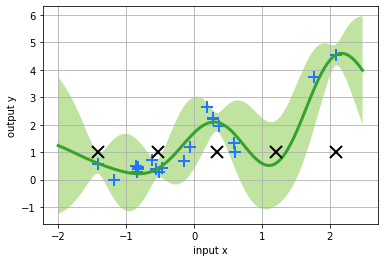

------------------------------------------------------
Example 2: user-defined inducing points


TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [3]:
from __future__ import division
from __future__ import print_function
from past.utils import old_div
#================================================================================
#    Marion Neumann [marion dot neumann at uni-bonn dot de]
#    Daniel Marthaler [dan dot marthaler at gmail dot com]
#    Shan Huang [shan dot huang at iais dot fraunhofer dot de]
#    Kristian Kersting [kristian dot kersting at cs dot tu-dortmund dot de]
#
#    This file is part of pyGPs.
#    The software package is released under the BSD 2-Clause (FreeBSD) License.
#
#    Copyright (c) by
#    Marion Neumann, Daniel Marthaler, Shan Huang & Kristian Kersting, 18/02/2014
#================================================================================

import pyGPs
import numpy as np

# To have a gerneral idea, 
# you may want to read demo_GPR, demo_kernel and demo_optimization first!
# Here, the focus is on the difference of FITC model.

print('')
print('-------------------GPR_FITC DEMO----------------------')

#----------------------------------------------------------------------
# Load demo data (generated from Gaussians)
#----------------------------------------------------------------------
demoData = np.load('regression_data.npz') 

x = demoData['x']            # training data
y = demoData['y']            # training target
z = demoData['xstar']        # test data
 

#----------------------------------------------------------------------
# Sparse GP regression (FITC) example
#----------------------------------------------------------------------

print("Example 1: default inducing points")

# Start from a new model 
model = pyGPs.GPR_FITC()

# Notice if you want to use default inducing points:
# You MUST call setData(x,y) FIRST!
# The default inducing points are a grid (hypercube in higher dimension), where
# each dimension has 5 values in equidistant steps between min and max value of the input data by default.
model.setData(x, y)

# To set value per dimension use:
# model.setData(x, y, value_per_axis=10)

model.optimize()
print("Negative log marginal liklihood optimized:", round(model.nlZ,3))

# Prediction             
model.predict(z)
# Again, plot() is a toy method for 1-d data
model.plot()



print('------------------------------------------------------')
print("Example 2: user-defined inducing points")

# Start from a new model 
model = pyGPs.GPR_FITC()            

# You can define inducing points yourself. 
# You can pick some points by hand
u = np.array([[-1], [-0.8], [-0.5], [0.3],[1.]])

# or equally-spaced inducing points
num_u = np.fix(old_div(x.shape[0],2))
u = np.linspace(-1.3,1.3,num_u).T
u = np.reshape(u,(num_u,1))


# and specify inducing point when seting prior
m = pyGPs.mean.Linear( D=x.shape[1] ) + pyGPs.mean.Const()  
k = pyGPs.cov.RBF()
model.setPrior(mean=m, kernel=k, inducing_points=u) 

# The rest is analogous to what we have done before
model.setData(x, y)
model.getPosterior()
print("Negative log marginal liklihood before optimization:", round(model.nlZ,3))
model.optimize()
print("Negative log marginal liklihood optimized:", round(model.nlZ,3))

# Prediction
ymu, ys2, fmu, fs2, lp = model.predict(z)
# Again, plot() is a toy method for 1-d data
model.plot()


print('--------------------END OF DEMO-----------------------')




